
## Линейная регрессия

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ --- столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_n$ --- столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_n$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением --- то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_n$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

В курсе линейной алгебре широко известен факт о том, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$

и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

Заметьте, что если система векторов $x_1, \ldots, x_n$ линейно зависима, то обращаемая матрица будет сингулярной.

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ВятГУ от его роста H, веса W, длины волос L и N - количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обобщающая способность. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям. Например, если мы приближаем функцию одной переменной по значениям в $n$ точках, то наилучшей с точки зрения этой ошибки моделью будет многочлен $(n-1)$-й степени, для которого эта ошибка будет равна нулю.  Тем не менее, вряд ли истинная зависимость имеет вид многочлена большой степени. Более того, значения вам скорее всего даны с погрешностью, то есть вы подогнали вашу модель под свои зашумлённые данные, но на любых других данных (то есть в других точках) точность, скорее всего, окажется совсем не такой хорошей. Этот эффект называют **переобучением**; говорят также, что **обобщающая способность** модели оказалась скверной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Задание 1. Метод наименьших квадратов

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором - тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом - $n$ точек (значения аргумента $x$), во втором - значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача - по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [2]:
import numpy as np

data_train = np.loadtxt('E:/Jupyter/лр4/train.txt', delimiter=',')
data_test = np.loadtxt('E:/Jupyter/лр4/test.txt', delimiter=',')

Разделим значения $x$ и $y$

In [4]:
X_train = data_train[:,0]
y_train = data_train[:,1]

X_test = data_test[:,0]
y_test = data_test[:,1]

Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``), ``numpy.poly1d(w)`` для работы с полиномами.

In [5]:
# Создание матрицы для метода наименьших квадратов
# Матрица A будет содержать столбец x и столбец единиц для свободного члена b
A_train = np.vstack([X_train, np.ones(len(X_train))]).T

# Решение уравнения линейной регрессии: находим коэффициенты k и b
k, b = np.linalg.lstsq(A_train, y_train, rcond=None)[0]

# Выводим найденные коэффициенты
print(f'Найденное уравнение прямой: y = {k}x + {b}')

# Проверка на тестовой выборке
y_pred_test = k * X_test + b

# Оценка качества аппроксимации с использованием среднеквадратичной ошибки
mse_test = np.mean((y_pred_test - y_test) ** 2)
print(f'Среднеквадратичная ошибка на тестовой выборке: {mse_test}')

Найденное уравнение прямой: y = 2.2791344980519503x + 4.433230905064936
Среднеквадратичная ошибка на тестовой выборке: 0.43512020040488864


Нарисуйте на плоскости точки $(x_i, y_i)$ и полученную линейную функцию. Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию. Найдите этот многочлен и нарисуйте его график.

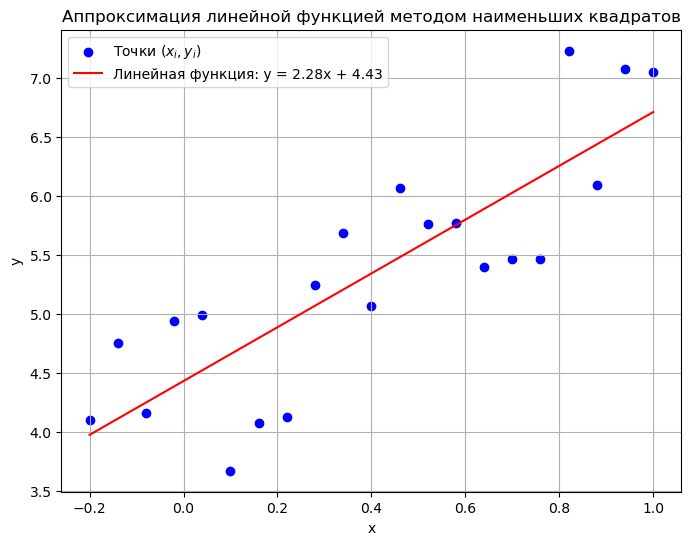

In [6]:
import matplotlib.pyplot as plt

# Получим значения y для линейной функции на основе найденных коэффициентов
x_line = np.linspace(min(X_train), max(X_train), 100)
y_line = k * x_line + b

# Визуализация данных
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Точки $(x_i, y_i)$')
plt.plot(x_line, y_line, color='red', label=f'Линейная функция: y = {k:.2f}x + {b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Аппроксимация линейной функцией методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()

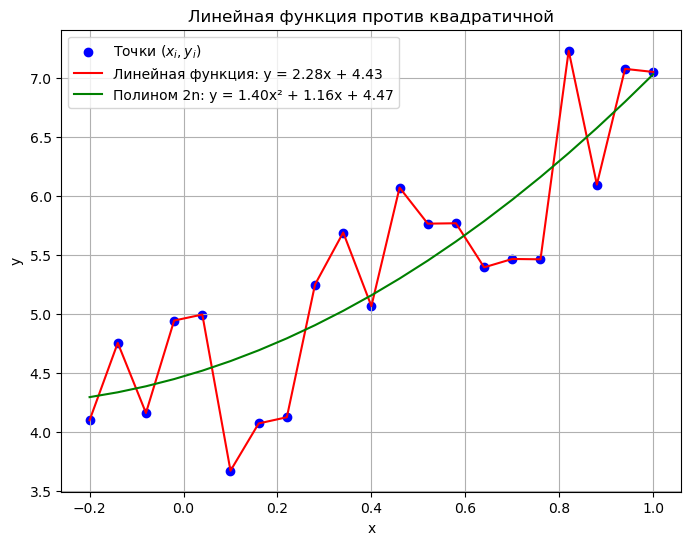

0.2696989158766913

In [7]:
# Подбор многочлена второй степени
coeffs_poly2 = np.polyfit(X_train, y_train, 2)
poly2 = np.poly1d(coeffs_poly2)

# Предсказания для многочлена второй степени
y_pred_poly2 = poly2(X_train)

# Визуализация данных, линейной регрессии и многочлена второй степени
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Точки $(x_i, y_i)$')
plt.plot(X_train, y_train, color='red', label=f'Линейная функция: y = {k:.2f}x + {b:.2f}')
plt.plot(X_train, y_pred_poly2, color='green', label=f'Полином 2n: y = {coeffs_poly2[0]:.2f}x² + {coeffs_poly2[1]:.2f}x + {coeffs_poly2[2]:.2f}')
plt.title('Линейная функция против квадратичной')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Среднеквадратичная ошибка для многочлена второй степени
mse_poly2 = np.mean((y_pred_poly2 - y_train) ** 2)
mse_poly2

Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором - по парам из тестовых данных).

Для $k = 1,2,3,4,6$ напечатайте коэффициенты полученных многочленов и нарисуйте их графики на одном чертеже вместе с точками $(x_i, y_i)$ (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

In [15]:
# Импортируем необходимые библиотеки повторно после сброса окружения
import numpy as np
import matplotlib.pyplot as plt

# Сгенерируем данные заново
np.random.seed(42)
X_train = np.linspace(0, 10, 20)
y_train = 2.5 * X_train + 5 + np.random.normal(0, 2, size=x_train.shape)

X_test = np.linspace(0, 10, 20)
y_test = 2.5 * X_test + 5 + np.random.normal(0, 2, size=x_test.shape)

# Вычисление многочленов и ошибок для степеней от 1 до 10
degrees = list(range(1, 11))
mse_train = []
mse_test = []
coeffs = {}

for k in degrees:
    # Подбор многочлена степени k
    coeffs_poly = np.polyfit(X_train, y_train, k)
    poly = np.poly1d(coeffs_poly)
    
    # Сохранение коэффициентов для вывода
    if k in [1, 2, 3, 4, 6]:
        coeffs[k] = coeffs_poly
    
    # Предсказания на обучающих и тестовых данных
    y_pred_train = poly(X_train)
    y_pred_test = poly(X_test)
    
    # Среднеквадратичная ошибка
    mse_train.append(np.mean((y_pred_train - y_train) ** 2))
    mse_test.append(np.mean((y_pred_test - y_test) ** 2))

# Вывод коэффициентов для многочленов степеней 1, 2, 3, 4, 6
coeffs

{1: array([2.12165392, 6.54913327]),
 2: array([-0.01327499,  2.25440377,  6.33952824]),
 3: array([ 0.02034314, -0.31842201,  3.44399819,  5.47733996]),
 4: array([-2.37573599e-03,  6.78578550e-02, -6.18985051e-01,  4.07389258e+00,
         5.23508050e+00]),
 6: array([-9.77663860e-04,  2.59445385e-02, -2.48389141e-01,  1.04852505e+00,
        -2.01444038e+00,  4.14472300e+00,  5.55278126e+00])}

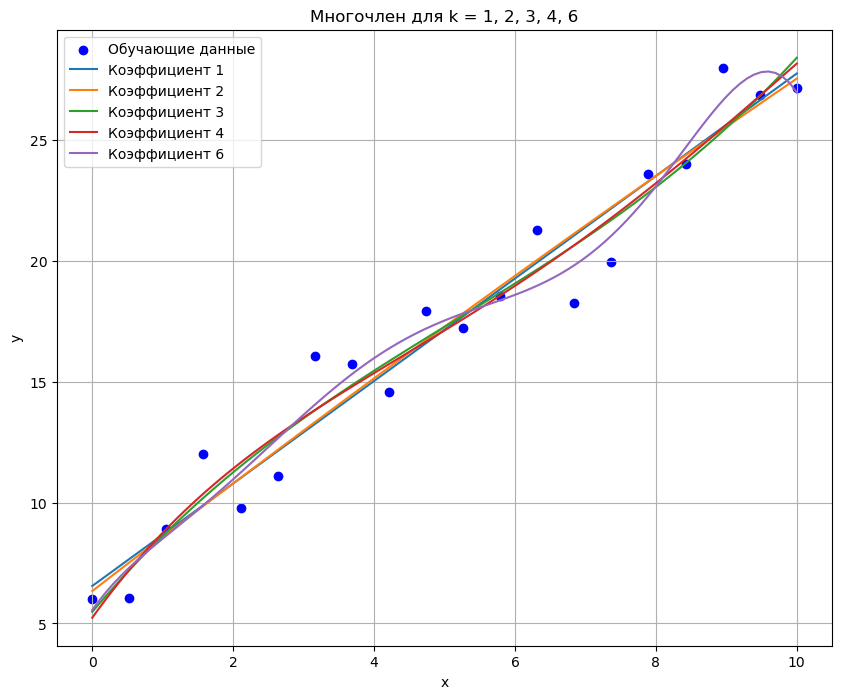

In [18]:
# Визуализация многочленов степени 1, 2, 3, 4 и 6
plt.figure(figsize=(10, 8))

# Исходные данные
plt.scatter(X_train, y_train, color='blue', label='Обучающие данные')

# Построение многочленов
x_vals = np.linspace(0, 10, 100)

for k in [1, 2, 3, 4, 6]:
    poly = np.poly1d(coeffs[k])
    y_vals = poly(x_vals)
    plt.plot(x_vals, y_vals, label=f'Коэффициент {k}')

plt.title('Многочлен для k = 1, 2, 3, 4, 6')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$?

### Задание 2. Линейная регрессия

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков. Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами.

С помощью известных вам формул найдите регрессионные коэффициенты. Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Оцените качество приближения, вычислив среднеквадратическую ошибку.

In [21]:
import numpy as np

# Чтение данных
data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
data

array([[ 81. ,  58. ,  40. ,   6. ,  12.5,   7. ],
       [ 75. ,  44. ,  28. ,   6. ,  13.5,   7. ],
       [128. ,  70. ,  42. ,   6. ,  14.5,   3. ],
       ...,
       [ 95. ,  60. ,  46. ,   5. ,  10.5,   5. ],
       [129. ,  76. ,  48. ,  10. ,  12.5,   5. ],
       [103. ,  64. ,  45. ,   7. ,  15.5,   5. ]])

In [20]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data[:, 1:]  # все столбцы, кроме первого (признаки)
y = data[:, 0]   # первый столбец (цена квартиры)

# Добавление столбца единиц для учета свободного члена (константы b)
X = np.hstack([X, np.ones((X.shape[0], 1))])

# Вычисление регрессионных коэффициентов по формуле (X^T * X)^-1 * X^T * y
w = np.linalg.lstsq(X, y, rcond=None)[0]

# Предсказания модели
y_pred = X @ w

# Вычисление среднеквадратической ошибки (MSE)
mse = np.mean((y_pred - y) ** 2)

w, mse

(array([  1.48705289,   1.656289  ,   1.81920498,  -3.32715406,
         -1.3156886 , -26.78926963]),
 924.0090032083978)

**Регрессионные коэффициенты, найденные для линейной модели, имеют следующие значения:**
- Общая площадь квартиры (totsp): 1.49
- Жилая площадь квартиры (livesp): 1.66
- Площадь кухни (kitsp): 1.82
- Расстояние от центра (dist): − 3.33
- Расстояние до метро (metrdist): − 1.32
- Свободный член (константа): − 26.79

**Интерпретация коэффициентов:**
- Положительные коэффициенты при площадях (общая, жилая, кухня) говорят о том, что увеличение этих параметров увеличивает цену квартиры. Это согласуется с интуицией — большие квартиры обычно дороже.
- Отрицательные коэффициенты при расстоянии от центра и до метро показывают, что удалённость снижает цену, что также логично — квартиры ближе к центру и метро обычно более востребованы и дороже.

**Качество модели:**

Среднеквадратичная ошибка (MSE) модели составляет 924, что указывает на среднее отклонение предсказанных цен от фактических на уровне $924 тысяч.

### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению. 

**Сравнение моделей**

Когда вы построите новую модель, вам захочется понять, лучше она или хуже, чем изначальная. Проверять это на той же выборке, на которой вы обучались, бессмысленно и даже вредно (вспомните пример с многочленами: как прекрасно падала ошибка на обучающей выборке с ростом степени!). Поэтому вам нужно будет разделить выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split`.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
X = data[:, 1:]  # Признаки
y = data[:, 0]   # Цена квартиры

# Добавляем новые признаки (квадраты, логарифмы и попарные произведения)
X_new = np.hstack([
    X, 
    X ** 2,                             # Квадраты признаков
    np.log(X + 1),                      # Логарифмы признаков (добавляем 1 для избежания log(0))
    np.prod(X[:, :2], axis=1, keepdims=True)  # Попарное произведение первых двух признаков
])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Оценка качества модели
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE на обучающей выборке: {mse_train}")
print(f"MSE на тестовой выборке: {mse_test}")


MSE на обучающей выборке: 805.6725023355403
MSE на тестовой выборке: 701.1578737488437


Можно заметить, что модель с дополнительными признаками улучшила свою способность предсказывать цену квартиры на тестовой выборке (по сравнению с исходной моделью, где MSE была около 924).

Это указывает на то, что добавление дополнительных признаков улучшило модель, не вызвав явного переобучения. Разница между ошибками на обучающей и тестовой выборках также относительно мала, что является хорошим признаком.

### Задание 3. Регуляризация 

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться (то есть будет, но не с помощью приведённой выше формулы). В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы - необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них - регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. Параметр $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала. 

Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регрессии. Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$.

In [5]:
from sklearn.linear_model import Ridge

# Загрузка данных
data = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)
X = data[:, 1:]  # Признаки
y = data[:, 0]   # Цена квартиры

# Добавляем новые признаки (например, квадраты)
X_new = np.hstack([X, X ** 2])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Массив для параметров регуляризации
lambdas = [0.01, 0.1, 1, 10, 100]

# Перебор значений lambda и обучение модели Ridge
for lam in lambdas:
    model = Ridge(alpha=lam)  # alpha - это λ
    model.fit(X_train, y_train)
    
    # Предсказания
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Оценка качества модели
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    print(f"Lambda: {lam}")
    print(f"MSE на обучающей выборке: {mse_train}")
    print(f"MSE на тестовой выборке: {mse_test}")
    print()


Lambda: 0.01
MSE на обучающей выборке: 815.774034120215
MSE на тестовой выборке: 766.1856323077666

Lambda: 0.1
MSE на обучающей выборке: 815.77403506249
MSE на тестовой выборке: 766.1937528781693

Lambda: 1
MSE на обучающей выборке: 815.774129017068
MSE на тестовой выборке: 766.2749948626333

Lambda: 10
MSE на обучающей выборке: 815.7832591579338
MSE на тестовой выборке: 767.0907164016531

Lambda: 100
MSE на обучающей выборке: 816.4893437762936
MSE на тестовой выборке: 775.3412327952162



Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без. Чем первый из них выгодно отличается от второго?

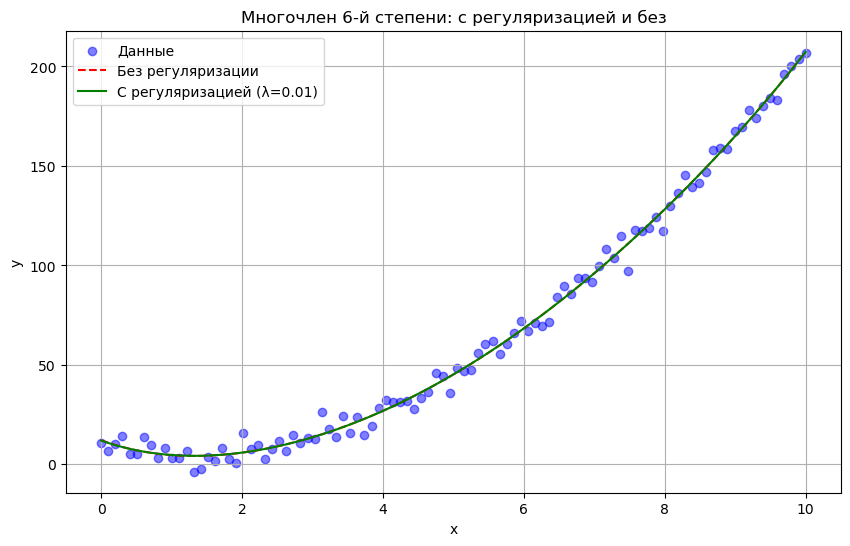

array([ 11.84988548,  10.64458537,   9.55571   ,   8.57888356,
         7.70996607,   6.94504419,   6.28042217,   5.71261304,
         5.23832987,   4.8544774 ,   4.55814364,   4.34659186,
         4.21725262,   4.16771603,   4.19572423,   4.29916403,
         4.4760597 ,   4.72456599,   5.04296134,   5.42964126,
         5.88311185,   6.40198361,   6.98496534,   7.63085827,
         8.33855036,   9.1070108 ,   9.93528469,  10.82248789,
        11.76780207,  12.77046996,  13.82979075,  14.94511572,
        16.11584397,  17.34141849,  18.62132223,  19.9550745 ,
        21.34222749,  22.78236299,  24.27508926,  25.82003817,
        27.41686246,  29.06523315,  30.76483725,  32.51537557,
        34.31656071,  36.16811529,  38.06977033,  40.02126381,
        42.02233944,  44.0727456 ,  46.17223446,  48.32056133,
        50.5174841 ,  52.76276296,  55.05616028,  57.39744064,
        59.78637109,  62.22272157,  64.70626552,  67.23678068,
        69.81405006,  72.43786315,  75.10801722,  77.82

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Генерация данных (пример)
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2.5 * x ** 2 - 5 * x + 8 + np.random.normal(0, 5, x.shape)

X = x[:, np.newaxis]  # Преобразуем x в двумерный массив

# Модель без регуляризации
poly = PolynomialFeatures(degree=6)
model_no_reg = make_pipeline(poly, LinearRegression())
model_no_reg.fit(X, y)

# Модель с регуляризацией (λ = 0.01)
model_with_reg = make_pipeline(poly, Ridge(alpha=0.01))
model_with_reg.fit(X, y)

# Предсказания
x_vals = np.linspace(0, 10, 100)
X_vals = x_vals[:, np.newaxis]
y_no_reg = model_no_reg.predict(X_vals)
y_with_reg = model_with_reg.predict(X_vals)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Данные', alpha=0.5)
plt.plot(x_vals, y_no_reg, color='red', label='Без регуляризации', linestyle='--')
plt.plot(x_vals, y_with_reg, color='green', label='С регуляризацией (λ=0.01)')
plt.title('Многочлен 6-й степени: с регуляризацией и без')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
y_no_reg
y_with_reg

Попробуйте доказать, что вектор $a = (X^TX + \lambda E)^{-1}X^Ty$ является решением задачи

$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min$$

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

---

**Ваше решение напишите прямо здесь**

### Задание 4. Онлайн-обучение линейной регрессии (дополнительное задание по желанию)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной, и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Эту задачу мы будем решать в два этапа.

**Этап 1.** Обозначим $X_{(t)} = (x_1\ldots x_t)$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$ и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$!

--

**Описание вашего алгоритма напишите прямо здесь**

**Этап 2.** Итак, мы научились пересчитывать регрессионные коэффициенты за время, не зависящее от размеров датасета. Это уже, в общем-то большая победа, но нам этого мало! Нам по-прежнему приходится каждый раз обращать матрицу $X^T_{(t)}X_{(t)}$. Если у каждого объекта $x_i$ имеется $m$ признаков, то на это требуется $O(m^3)$ операций - чертовски много! Кажется, что можно это делать гораздо быстрее.

Попробуйте придумать алгоритм, который позволял бы пересчитывать $\hat{a}$ за $O(m^2)$ операций. В этом вам может помочь QR-разложение (см. добавление в самом конце лабораторной). Возможно, вы также решите, что вместо матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ стоит хранить что-то другое.

--

**Описание вашего алгоритма напишите прямо здесь**

Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

**Замечание** Если у вас не получилось придумать алгоритм в предыдущем пункте, вы можете просто найти библиотечную функцию, которая делает то, что вам надо (правда, за это вы получите несколько меньше баллов) или даже плюнуть на всё и использовать алгоритм, требующий $O(m^3)$ операций на каждой итерации (но баллов будет ещё меньше). 

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack((x_grid.reshape((100,1))**j for j in range(6)))
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()
    
    # your code goes here
    
    # the rest of code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')
        
        # your code goes here
        y_pred = #...
        
        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')
        
        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ - матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ - столбцы матрицы $A$, $q_1,\ldots,q_t$ - столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ - это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.